In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import PIL.Image
import time
import os
import random
from IPython.display import Image
from glob import glob
import cv2

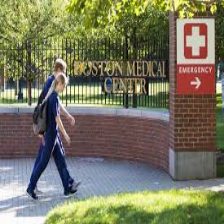

In [2]:
img = Image("/home/dhruv/walk_or_run/walk_or_run_train/train/walk/walk_0ab43cab.png")
img

In [2]:
Path = os.path.abspath("/home/dhruv/walk_or_run")
# Train Run Images
train_run_images = os.path.join(Path,"walk_or_run_train","train","run")
train_run = glob(os.path.join(train_run_images, "*.png"))

# Train walk Images
train_walk_images = os.path.join(Path,"walk_or_run_train","train","walk")
train_walk = glob(os.path.join(train_walk_images,"*.png"))

train = pd.DataFrame()
train['file'] = train_run + train_walk
train.head()

,file
0,/home/dhruv/walk_or_run/walk_or_run_train/trai...
1,/home/dhruv/walk_or_run/walk_or_run_train/trai...
2,/home/dhruv/walk_or_run/walk_or_run_train/trai...
3,/home/dhruv/walk_or_run/walk_or_run_train/trai...
4,/home/dhruv/walk_or_run/walk_or_run_train/trai...


In [3]:
Path = os.path.abspath("/home/dhruv/walk_or_run")
# Test Run Images
test_run_images = os.path.join(Path,"walk_or_run_test","test","run")
test_run = glob(os.path.join(test_run_images, "*.png"))

# Test walk Images
test_walk_images = os.path.join(Path, "walk_or_run_test","test", "walk")
test_walk = glob(os.path.join(test_walk_images, "*.png"))

test = pd.DataFrame()
test['file'] = test_run + test_walk
test.shape

(141, 1)

In [4]:
train['label'] = [1 if i in train_run else 0 for i in train['file']]
train.head()

,file,label
0,/home/dhruv/walk_or_run/walk_or_run_train/trai...,1
1,/home/dhruv/walk_or_run/walk_or_run_train/trai...,1
2,/home/dhruv/walk_or_run/walk_or_run_train/trai...,1
3,/home/dhruv/walk_or_run/walk_or_run_train/trai...,1
4,/home/dhruv/walk_or_run/walk_or_run_train/trai...,1


In [5]:
test['label'] = [1 if i in test_run else 0 for i in test['file']]

In [6]:
test.head()

,file,label
0,/home/dhruv/walk_or_run/walk_or_run_test/test/...,1
1,/home/dhruv/walk_or_run/walk_or_run_test/test/...,1
2,/home/dhruv/walk_or_run/walk_or_run_test/test/...,1
3,/home/dhruv/walk_or_run/walk_or_run_test/test/...,1
4,/home/dhruv/walk_or_run/walk_or_run_test/test/...,1


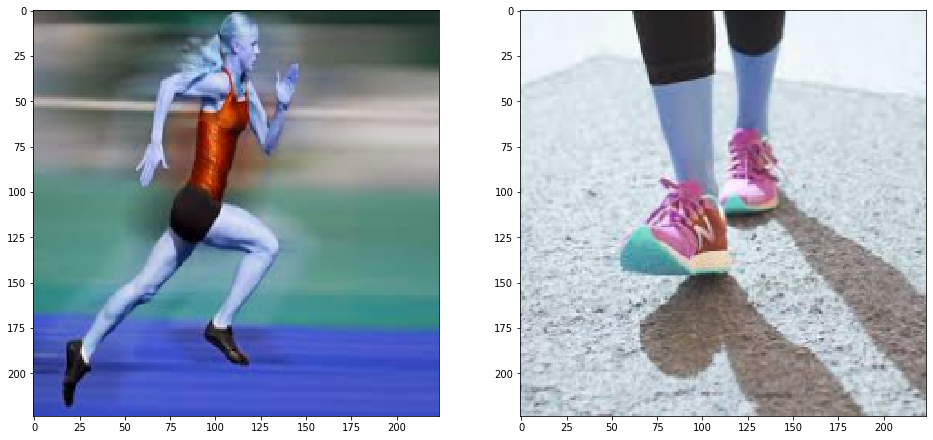

In [48]:
plt.figure(figsize = (16,16))
plt.subplot(121)
plt.imshow(cv2.imread(train_run[10]))

plt.subplot(122)
plt.imshow(cv2.imread(train_walk[9]))

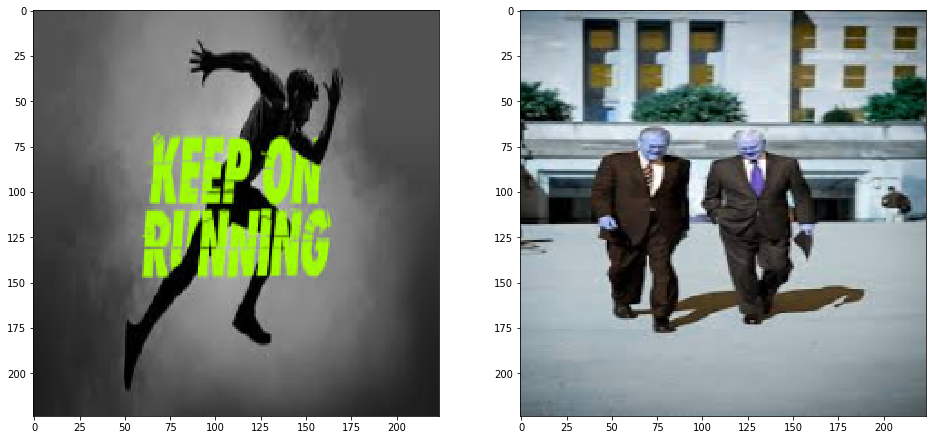

In [50]:
plt.figure(figsize = (16,16))
plt.subplot(121)
plt.imshow(cv2.imread(test_run[1]))

plt.subplot(122)
plt.imshow(cv2.imread(test_walk[2]))

In [8]:
x_train3D = []
for i in range(0,600):
    x_train3D.append(cv2.imread(train.file[i]).reshape(224*224,3))
    
x_train3D = np.asarray(x_train3D)
x_train3D = x_train3D/1000 # for scaling

y_train = train.label
y_train = np.asarray(y_train)

In [9]:
print('x_train3D shape: ', x_train3D.shape)
print('y_train shape: ', y_train.shape)

x_train3D shape:  (600, 50176, 3)
y_train shape:  (600,)


In [10]:
x_train = np.zeros((600,50176))
for i in range(0,600):
    for j in range(0,50176):
        x_train[i,j] = ((0.299*x_train3D[i][j][0])+(0.5870*x_train3D[i][j][1])+(0.1140*x_train3D[i][j][2]))

x_train = np.asarray(x_train)

In [11]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)

x_train shape:  (600, 50176)
y_train shape:  (600,)


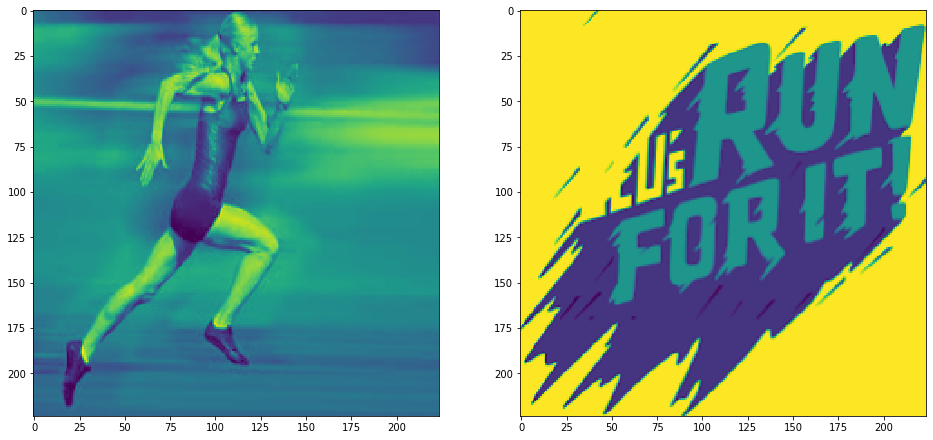

In [57]:
img_size = 224
plt.figure(figsize=(16,16))
plt.subplot(1, 2, 1)
plt.imshow(x_train[10].reshape(img_size, img_size))
plt.subplot(1, 2, 2)
plt.imshow(x_train[9].reshape(img_size, img_size))

In [12]:
x_test3D = []
for i in range(0,141):
    x_test3D.append(cv2.imread(test.file[i]).reshape(224*224,3))

x_test3D = np.asarray(x_test3D)

y_test = test.label
y_test = np.asarray(y_test)

In [13]:
print('x_test3D shape: ', x_test3D.shape)
print('y_test shape: ', y_test.shape)

x_test3D shape:  (141, 50176, 3)
y_test shape:  (141,)


In [14]:
x_test = np.zeros((141,50176))
for i in range(0,141):
    for j in range(0,50176):
        x_test[i,j] = ((0.299*x_test3D[i][j][0])+(0.5870*x_test3D[i][j][1])+(0.1140*x_test3D[i][j][2]))

x_test = np.asarray(x_test)

In [15]:
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_test shape:  (141, 50176)
y_test shape:  (141,)


In [16]:
x_train = x_train.reshape(-1,224,224,1)
x_test = x_test.reshape(-1,224,224,1)
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)

x_train shape:  (600, 224, 224, 1)
x_test shape:  (141, 224, 224, 1)


# Model 1.0

In [81]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout

model = Sequential()
model.add((Conv2D(filters = 11, strides = (4,4),activation = 'relu',input_shape = (224,224,1),padding = 'Same',
                   kernel_size = (5,5))))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.10))
model.add((Conv2D(filters = 11,kernel_size = (5,5), strides = (4,4),activation = 'relu')))
model.add(MaxPool2D(pool_size = (3,3),strides = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 11,activation = 'relu', strides = (4,4),kernel_size = (2,2)))
model.add(Conv2D(filters = 11,activation = 'relu', strides = (4,4),kernel_size = (1,1)))
#model.add(Conv2D(filters = 11,activation = 'relu', strides = (4,4),kernel_size = (3,3)))
model.add(MaxPool2D(pool_size = (1,1),strides = (2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [84]:
from keras.optimizers import RMSprop,Adam
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.99)

In [85]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 56, 56, 11)        286       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 28, 28, 11)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 28, 28, 11)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 6, 6, 11)          3036      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 2, 2, 11)          0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 2, 2, 11)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 1, 1, 11)        

In [86]:
model.compile(optimizer = optimizer, loss="binary_crossentropy",metrics = ["accuracy"])

In [23]:
epochs = 100
batch_size = 3

In [131]:
history = model.fit(x_train,y_train,epochs = epochs, validation_data = (x_test,y_test),batch_size=batch_size)

Train on 600 samples, validate on 141 samples
Epoch 1/100
600/600 [==============================] - 5s 8ms/step - loss: 0.6947 - accuracy: 0.5667 - val_loss: 32.4103 - val_accuracy: 0.5816
Epoch 2/100
600/600 [==============================] - 10s 17ms/step - loss: 0.6917 - accuracy: 0.5600 - val_loss: 75.0067 - val_accuracy: 0.5816
Epoch 3/100
600/600 [==============================] - 10s 17ms/step - loss: 0.6896 - accuracy: 0.5233 - val_loss: 70.8856 - val_accuracy: 0.5816
Epoch 4/100
600/600 [==============================] - 9s 14ms/step - loss: 0.6893 - accuracy: 0.5233 - val_loss: 79.2420 - val_accuracy: 0.5816
Epoch 5/100
600/600 [==============================] - 7s 12ms/step - loss: 0.6915 - accuracy: 0.5200 - val_loss: 55.1418 - val_accuracy: 0.5816
Epoch 6/100
600/600 [==============================] - 11s 18ms/step - loss: 0.6882 - accuracy: 0.5467 - val_loss: 120.5966 - val_accuracy: 0.5816
Epoch 7/100
600/600 [==============================] - 15s 25ms/step - loss: 0.69

In [138]:
score,acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc*100)

141/141 [==============================] - 0s 2ms/step
Test accuracy: 57.446807622909546


In [139]:
score,acc = model.evaluate(x_train, y_train,
                            batch_size=batch_size)
print('Train accuracy:', acc*100)

600/600 [==============================] - 1s 2ms/step
Train accuracy: 97.33333587646484


In [17]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range 1 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train) # datagen.flow() creates an iterator, can use it.next() to traverse

In [146]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/100
200/200 [==============================] - 24s 122ms/step - loss: 0.7807 - accuracy: 0.5017 - val_loss: 27.7681 - val_accuracy: 0.3972
Epoch 2/100
200/200 [==============================] - 25s 127ms/step - loss: 0.6991 - accuracy: 0.5017 - val_loss: 37.5856 - val_accuracy: 0.4255
Epoch 3/100
200/200 [==============================] - 18s 92ms/step - loss: 0.7066 - accuracy: 0.4850 - val_loss: 10.2222 - val_accuracy: 0.4184
Epoch 4/100
200/200 [==============================] - 17s 84ms/step - loss: 0.7018 - accuracy: 0.4817 - val_loss: 30.2465 - val_accuracy: 0.4184
Epoch 5/100
200/200 [==============================] - 20s 100ms/step - loss: 0.6985 - accuracy: 0.4533 - val_loss: 21.2594 - val_accuracy: 0.4113
Epoch 6/100
200/200 [==============================] - 27s 137ms/step - loss: 0.6976 - accuracy: 0.4800 - val_loss: 4.7557 - val_accuracy: 0.6099
Epoch 7/100
200/200 [==============================] - 21s 104ms/step - loss: 0.6965 - accuracy: 0.4767 - val_loss: 3.133

Epoch 57/100
200/200 [==============================] - 21s 104ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 4.2293 - val_accuracy: 0.4113
Epoch 58/100
200/200 [==============================] - 18s 92ms/step - loss: 0.6934 - accuracy: 0.5017 - val_loss: 2.4843 - val_accuracy: 0.4184
Epoch 59/100
200/200 [==============================] - 21s 106ms/step - loss: 0.6932 - accuracy: 0.5083 - val_loss: 1.1461 - val_accuracy: 0.4184
Epoch 60/100
200/200 [==============================] - 26s 131ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 1.6655 - val_accuracy: 0.4184
Epoch 61/100
200/200 [==============================] - 17s 87ms/step - loss: 0.6941 - accuracy: 0.4867 - val_loss: 0.6924 - val_accuracy: 0.4255
Epoch 62/100
200/200 [==============================] - 19s 93ms/step - loss: 0.6938 - accuracy: 0.4683 - val_loss: 0.6928 - val_accuracy: 0.4255
Epoch 63/100
200/200 [==============================] - 18s 88ms/step - loss: 0.6933 - accuracy: 0.4700 - val_loss: 0.692

In [147]:
score,acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc*100)

141/141 [==============================] - 0s 2ms/step
Test accuracy: 42.553192377090454


In [148]:
score,acc = model.evaluate(x_train, y_train,
                            batch_size=batch_size)
print('Train accuracy:', acc*100)

600/600 [==============================] - 2s 3ms/step
Train accuracy: 50.16666650772095


# Model 2.0 Deeper

In [19]:
# Conv2D =  kernel_size = (3,3), strides = (1,1), padding = same
# MaxPool = kernel_size = (2,2), strides = (2,2)
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout

model2 = Sequential()
model2.add((Conv2D(filters = 64, strides = (1,1),activation = 'relu',input_shape = (224,224,1),padding = 'Same',
                   kernel_size = (3,3))))
model2.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model2.add(Dropout(0.10))
model2.add((Conv2D(filters = 64,kernel_size = (3,3), strides = (1,1),activation = 'relu')))
model2.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(filters = 128,activation = 'relu', strides = (1,1),kernel_size = (3,3)))
model2.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model2.add(Dropout(0.1))
model2.add(Conv2D(filters = 128,activation = 'relu', strides = (1,1),kernel_size = (3,3)))
model2.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model2.add(Dropout(0.1))
model2.add(Conv2D(filters = 128,activation = 'relu', strides = (1,1),kernel_size = (3,3)))
model2.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model2.add(Flatten())
model2.add(Dense(1000,activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(500, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(100,activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation = 'sigmoid'))

In [175]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 110, 110, 64)      36928     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 55, 55, 64)        0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 53, 53, 128)     

# Adam Optimizer

In [176]:
from keras.optimizers import RMSprop,Adam
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.99)

In [177]:
model2.compile(optimizer = optimizer, loss="binary_crossentropy",metrics = ["accuracy"])

In [180]:
# Along with Data Augmentation
history = model2.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 20, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/20
200/200 [==============================] - 76s 381ms/step - loss: 0.6933 - accuracy: 0.4667 - val_loss: 0.6928 - val_accuracy: 0.5816
Epoch 2/20
200/200 [==============================] - 80s 398ms/step - loss: 0.6933 - accuracy: 0.4500 - val_loss: 0.6928 - val_accuracy: 0.5816
Epoch 3/20
200/200 [==============================] - 81s 405ms/step - loss: 0.6933 - accuracy: 0.4800 - val_loss: 0.6928 - val_accuracy: 0.5816
Epoch 4/20
200/200 [==============================] - 80s 401ms/step - loss: 0.6933 - accuracy: 0.4867 - val_loss: 0.6933 - val_accuracy: 0.4752
Epoch 5/20
200/200 [==============================] - 78s 389ms/step - loss: 0.6933 - accuracy: 0.5017 - val_loss: 0.6930 - val_accuracy: 0.5745
Epoch 6/20
200/200 [==============================] - 82s 411ms/step - loss: 0.6932 - accuracy: 0.4533 - val_loss: 0.6929 - val_accuracy: 0.5957
Epoch 7/20
200/200 [==============================] - 80s 401ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_ac

In [181]:
score,acc = model2.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc*100)

141/141 [==============================] - 6s 40ms/step
Test accuracy: 46.09929025173187


In [182]:
score,acc = model2.evaluate(x_train, y_train,
                            batch_size=batch_size)
print('Train accuracy:', acc*100)

600/600 [==============================] - 28s 46ms/step
Train accuracy: 50.16666650772095


# Stochastic Gradient Descent

In [20]:
from keras.optimizers import RMSprop,Adam,SGD,Nadam
optimizer = SGD(lr = 0.001)

In [21]:
model2.compile(optimizer = optimizer, loss="binary_crossentropy",metrics = ["accuracy"])

In [24]:
# Along with Data Augmentation
history = model2.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 20, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/20
200/200 [==============================] - 80s 399ms/step - loss: 0.6933 - accuracy: 0.4633 - val_loss: 0.7844 - val_accuracy: 0.5248
Epoch 2/20
200/200 [==============================] - 78s 391ms/step - loss: 0.6934 - accuracy: 0.4483 - val_loss: 0.7828 - val_accuracy: 0.5106
Epoch 3/20
200/200 [==============================] - 80s 398ms/step - loss: 0.6932 - accuracy: 0.4717 - val_loss: 0.7972 - val_accuracy: 0.5177
Epoch 4/20
200/200 [==============================] - 92s 460ms/step - loss: 0.6933 - accuracy: 0.4750 - val_loss: 0.7913 - val_accuracy: 0.5390
Epoch 5/20
200/200 [==============================] - 72s 361ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.7954 - val_accuracy: 0.5461
Epoch 6/20
200/200 [==============================] - 72s 361ms/step - loss: 0.6932 - accuracy: 0.5267 - val_loss: 0.8043 - val_accuracy: 0.5957
Epoch 7/20
200/200 [==============================] - 73s 364ms/step - loss: 0.6933 - accuracy: 0.4850 - val_loss: 0.8368 - val_ac

# Nadam

In [25]:
from keras.optimizers import RMSprop,Adam,SGD,Nadam
optimizer = Nadam(lr = 0.001, beta_1 = 0.9,beta_2 = 0.99)

In [26]:
model2.compile(optimizer = optimizer, loss="binary_crossentropy",metrics = ["accuracy"])

In [27]:
# Along with Data Augmentation
history = model2.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 10, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
200/200 [==============================] - 115s 577ms/step - loss: 0.6959 - accuracy: 0.4783 - val_loss: 0.7918 - val_accuracy: 0.4184
Epoch 2/10
200/200 [==============================] - 109s 543ms/step - loss: 0.8737 - accuracy: 0.5017 - val_loss: 0.6970 - val_accuracy: 0.4184
Epoch 3/10
200/200 [==============================] - 118s 588ms/step - loss: 0.6933 - accuracy: 0.4833 - val_loss: 0.6965 - val_accuracy: 0.4184
Epoch 4/10
200/200 [==============================] - 114s 569ms/step - loss: 0.6933 - accuracy: 0.4917 - val_loss: 0.6967 - val_accuracy: 0.4184
Epoch 5/10
200/200 [==============================] - 110s 549ms/step - loss: 0.6933 - accuracy: 0.4700 - val_loss: 0.6967 - val_accuracy: 0.4184
Epoch 6/10
200/200 [==============================] - 92s 461ms/step - loss: 0.6933 - accuracy: 0.4817 - val_loss: 0.6969 - val_accuracy: 0.4184
Epoch 7/10
200/200 [==============================] - 87s 435ms/step - loss: 0.6933 - accuracy: 0.5017 - val_loss: 0.6969 - v